# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns

## Load data

In [2]:
# Load the data files into different DataFrames
users = pd.read_csv("/datasets/megaline_users.csv")
calls = pd.read_csv("/datasets/megaline_calls.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
print(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Print a sample of data for plans
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Description</b> The problems I see are that usd_monthly_pay and usd_per_gb need to be the float datatype. 

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype(float)
plans['usd_per_gb'] = plans['usd_per_gb'].astype(float)
print(plans.duplicated().sum())

0


## Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [6]:
# Print the general/summary information about the users' DataFrame
print(users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [7]:
# Print a sample of data for users
display(users.sample(5))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
65,1065,Sherlyn,Noel,26,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-03,surf,NaN
293,1293,Lanny,Nolan,23,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-13,surf,NaN
168,1168,Shay,Weaver,58,"Milwaukee-Waukesha, WI MSA",2018-12-13,surf,NaN
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
344,1344,Hugo,Daugherty,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-25,surf,NaN


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

All right

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

 <div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Description</b> Churn_date only has 34 non missing values,  which means that the majority of people had the calling plans being used when the database was extracted (from description of data). It, aswell as reg_date, also needs to be in the datetime datatype. (Not sure if I should replace the missing values with something or not, so I won't.)

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
print(users.duplicated().sum())

0


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

## Calls

In [9]:
# Print the general/summary information about the calls' DataFrame
print(calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [10]:
# Print a sample of data for calls
display(calls.sample(5))


,id,user_id,call_date,duration
38303,1144_191,1144,2018-06-23,11.33
108047,1382_1100,1382,2018-11-21,0.00
36193,1138_146,1138,2018-08-29,16.05
84795,1312_287,1312,2018-07-13,0.00
77027,1277_103,1277,2018-10-06,10.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

 <div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Description</b> Pretty sure the id is supposed to have underscores in it so that's no problem. I just need to change the call_date column to datetime.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = np.ceil(calls['duration'])
print(calls.duplicated().sum())

0


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct

### Enrich data

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Enrichment</b> The duration of the calls are always rounded up to the minute, no matter how short the call

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

Good for you for using ceil()

## Messages

In [12]:
# Print the general/summary information about the messages' DataFrame
print(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [13]:
# Print a sample of data for messages
display(messages.sample(5))


,id,user_id,message_date
27299,1167_256,1167,2018-11-26
46331,1316_161,1316,2018-05-22
48682,1326_219,1326,2018-08-25
56036,1354_263,1354,2018-11-20
74577,1480_357,1480,2018-12-17


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Description</b> Just need to change another date column. Also noticed that there are much more calls than messages so there'll be some missing values where calls and messages overlap.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
print(messages.duplicated().sum())

0


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

Duplicate checking is the basis of data preprocessing

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [15]:
# Print the general/summary information about the internet DataFrame
print(internet.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [16]:
# Print a sample of data for the internet traffic
display(internet.sample(5))


,id,user_id,session_date,mb_used
53376,1240_348,1240,2018-11-01,801.07
93443,1436_14,1436,2018-12-14,117.73
88582,1408_301,1408,2018-11-26,389.03
90704,1417_389,1417,2018-10-08,863.05
72903,1339_40,1339,2018-09-20,0.00


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Description</b> Just the date column again 

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [17]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
print(internet.duplicated().sum()) 
# There will be duplicates in the session_date column because there can be more than one call on a particular day

0


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [18]:
# Print out the plan conditions and make sure they are clear for you 
display(plans)

# Every column with "usd_per" is the charge rate after the included package limits are exceeded

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [19]:
# Calculate the number of calls made by each user per month.


calls['month'] = calls['call_date'].dt.to_period('M')

# Group by 'user' and 'month', and calculate the number of calls made by each user per month
calls_users = pd.merge(calls, users, on='user_id')

calls_per_month = calls_users.groupby(['user_id', 'month']).size().reset_index(name='number_of_calls')

print(calls_per_month)

      user_id    month  number_of_calls
0        1000  2018-12               16
1        1001  2018-08               27
2        1001  2018-09               49
3        1001  2018-10               65
4        1001  2018-11               64
...       ...      ...              ...
2253     1498  2018-12               39
2254     1499  2018-09               41
2255     1499  2018-10               53
2256     1499  2018-11               45
2257     1499  2018-12               65

[2258 rows x 3 columns]


In [20]:
# Calculate the amount of minutes spent by each user per month. Save the result.


# Not really sure what this wants me to do. The number_of_calls column is already in minutes? 

In [21]:
# Calculate the number of messages sent by each user per month. Save the result.


messages['month'] = messages['message_date'].dt.to_period('M')

users_messages = pd.merge(messages, users, on='user_id')

# Group by user and month, then count the number of messages
msg_per_month = users_messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')

display(msg_per_month)

,user_id,month,messages_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [22]:
# Calculate the volume of internet traffic used by each user per month. Save the result.


internet['month'] = internet['session_date'].dt.to_period('M')

merged_internet_data = pd.merge(internet, users, on='user_id')

# Group by user and month, then sum the internet usage in megabytes and round up to gigabytes
gbs_per_month = merged_internet_data.groupby(['user_id', 'month'])['mb_used'].sum().apply(np.ceil).div(1024).reset_index(name='total_gb_used')

display(gbs_per_month)

,user_id,month,total_gb_used
0,1000,2018-12,1.857422
1,1001,2018-08,6.757812
2,1001,2018-09,13.002930
3,1001,2018-10,21.807617
4,1001,2018-11,18.071289
...,...,...,...
2272,1498,2018-12,22.595703
2273,1499,2018-09,12.680664
2274,1499,2018-10,19.036133
2275,1499,2018-11,16.419922


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [23]:
# Merge the data for calls, minutes, messages, internet based on user_id and month


user_consumption = pd.merge(calls_per_month, gbs_per_month, on=['user_id', 'month'], how='outer')
user_consumption = pd.merge(user_consumption, msg_per_month, on=['user_id', 'month'], how='outer')
user_consumption['total_gb_used'] = np.ceil(user_consumption['total_gb_used'])
user_consumption = user_consumption.fillna(0)

display(user_consumption)


,user_id,month,number_of_calls,total_gb_used,messages_count
0,1000,2018-12,16.0,2.0,11.0
1,1001,2018-08,27.0,7.0,30.0
2,1001,2018-09,49.0,14.0,44.0
3,1001,2018-10,65.0,22.0,53.0
4,1001,2018-11,64.0,19.0,36.0
...,...,...,...,...,...
2288,1349,2018-10,0.0,13.0,76.0
2289,1349,2018-11,0.0,17.0,72.0
2290,1349,2018-12,0.0,13.0,61.0
2291,1361,2018-05,0.0,2.0,2.0


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Correct

In [24]:
# Add the plan information 
# Not sure if it wants me to put the information about the plans in the dataframe or which plan each user had so I'm doing both


user_consumption = pd.merge(user_consumption, users[['user_id', 'plan']], on='user_id', how='outer')
user_consumption = pd.concat([user_consumption, plans], axis=1)

display(user_consumption)

,user_id,month,number_of_calls,total_gb_used,messages_count,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16.0,2.0,11.0,ultimate,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf
1,1001,2018-08,27.0,7.0,30.0,surf,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate
2,1001,2018-09,49.0,14.0,44.0,surf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001,2018-10,65.0,22.0,53.0,surf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001,2018-11,64.0,19.0,36.0,surf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaT,NaN,NaN,NaN,surf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2299,1319,NaT,NaN,NaN,NaN,surf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2300,1378,NaT,NaN,NaN,NaN,surf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2301,1463,NaT,NaN,NaN,NaN,ultimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [25]:
surf_plan_details = plans[plans['plan_name'] == 'surf'].iloc[0]
ultimate_plan_details = plans[plans['plan_name'] == 'ultimate'].iloc[0]

def replace_nan_values(row):
    if row['plan'] == 'surf':
        row['messages_included'] = row['messages_included'] if not pd.isnull(row['messages_included']) else surf_plan_details['messages_included']
        row['mb_per_month_included'] = row['mb_per_month_included'] if not pd.isnull(row['mb_per_month_included']) else surf_plan_details['mb_per_month_included']
        row['minutes_included'] = row['minutes_included'] if not pd.isnull(row['minutes_included']) else surf_plan_details['minutes_included']
        row['usd_monthly_pay'] = row['usd_monthly_pay'] if not pd.isnull(row['usd_monthly_pay']) else surf_plan_details['usd_monthly_pay']
        row['usd_per_gb'] = row['usd_per_gb'] if not pd.isnull(row['usd_per_gb']) else surf_plan_details['usd_per_gb']
        row['usd_per_message'] = row['usd_per_message'] if not pd.isnull(row['usd_per_message']) else surf_plan_details['usd_per_message']
        row['usd_per_minute'] = row['usd_per_minute'] if not pd.isnull(row['usd_per_minute']) else surf_plan_details['usd_per_minute']
    elif row['plan'] == 'ultimate':
        row['messages_included'] = row['messages_included'] if not pd.isnull(row['messages_included']) else ultimate_plan_details['messages_included']
        row['mb_per_month_included'] = row['mb_per_month_included'] if not pd.isnull(row['mb_per_month_included']) else ultimate_plan_details['mb_per_month_included']
        row['minutes_included'] = row['minutes_included'] if not pd.isnull(row['minutes_included']) else ultimate_plan_details['minutes_included']
        row['usd_monthly_pay'] = row['usd_monthly_pay'] if not pd.isnull(row['usd_monthly_pay']) else ultimate_plan_details['usd_monthly_pay']
        row['usd_per_gb'] = row['usd_per_gb'] if not pd.isnull(row['usd_per_gb']) else ultimate_plan_details['usd_per_gb']
        row['usd_per_message'] = row['usd_per_message'] if not pd.isnull(row['usd_per_message']) else ultimate_plan_details['usd_per_message']
        row['usd_per_minute'] = row['usd_per_minute'] if not pd.isnull(row['usd_per_minute']) else ultimate_plan_details['usd_per_minute']

    return row

# Apply the mapping function to replace NaN values
user_consumption = user_consumption.apply(replace_nan_values, axis=1)

In [26]:
def calculate_monthly_revenue(row):
    
    # Store monthly payment of the plan that user has taken
    plan_monthly_charge = row.usd_monthly_pay
    
    # Calculate revenue for calls, if user exceeded the limit covered by the plan
    #-----------------------------------------------------------------------------
    # number_of_calls: Total mins the user has spent in call in the particular month after rounding up
    # minutes_included: Monthly minute allowance of the plan
    # usd_per_minute: Price per minute after exceeding the package limits
    extra_call_mins = row.number_of_calls - row.minutes_included
    if extra_call_mins > 0:
        call_revenue = extra_call_mins * row.usd_per_minute
    else:
        call_revenue = 0
    
    # Calculate revenue for messages, if user exceeded limit covered by the plan
    #---------------------------------------------------------------------------
    # messages_count: Total number of messages sent by the user in the particular month
    # messages_included: Monthly text allowance of the plan
    # usd_per_message: Price per text after exceeding the package limits
    extra_messages = row.messages_count - row.messages_included
    if extra_messages > 0:
        message_revenue = extra_messages * row.usd_per_message
    else:
        message_revenue = 0
    
    # Calculate revenue for internet usage, if user exceeded limit covered by the plan
    #----------------------------------------------------------------------------------
    # total_gb_used: Total volume of internet traffic used by the user in the particular month
    # gb_per_month_included: Data volume allowance (in gigabytes) of the plan
    # usd_per_gb: Price per extra gigabyte of data after exceeding the package limits
    extra_internet_gb = (row.total_gb_used - row.mb_per_month_included / 1024)
    if extra_internet_gb > 0:
        internet_revenue = extra_internet_gb * row.usd_per_gb
    else:
        internet_revenue = 0
        
    monthly_revenue = plan_monthly_charge + call_revenue + message_revenue + internet_revenue
    
    return monthly_revenue


user_consumption['monthly_revenue'] = user_consumption.apply(calculate_monthly_revenue, axis=1)
print(user_consumption['monthly_revenue'].sample(10))

1290     50.15
790      51.80
2199    100.00
205      70.00
2196     20.00
1699     20.00
1274    130.00
1783     70.00
60      140.00
1106     20.00
Name: monthly_revenue, dtype: float64


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Observation</b> Doesn't seem like a lot of people exceed their plan limits

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's Comment </b> I fixed some issues in the code where I used the same variable for each calculation. But if it's still wrong, can you elaborate?

In [27]:
user_consumption

,user_id,month,number_of_calls,total_gb_used,messages_count,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
0,1000,2018-12,16.0,2.0,11.0,ultimate,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,20.00
1,1001,2018-08,27.0,7.0,30.0,surf,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate,70.00
2,1001,2018-09,49.0,14.0,44.0,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,NaN,20.00
3,1001,2018-10,65.0,22.0,53.0,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,NaN,90.09
4,1001,2018-11,64.0,19.0,36.0,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,NaN,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaT,NaN,NaN,NaN,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,NaN,20.00
2299,1319,NaT,NaN,NaN,NaN,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,NaN,20.00
2300,1378,NaT,NaN,NaN,NaN,surf,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,NaN,20.00
2301,1463,NaT,NaN,NaN,NaN,ultimate,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,NaN,70.00


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №3__

Give me an explanation, please. Where is the column with the number of minutes in your dataset? (duration)?

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's Comment </b> Sorry, I have it under number_of_calls since I loaded duration into that variable (1.12.1) and didn't see a need to convert it to a different one once I saw that it was already in minutes

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №4__

All right

In [28]:
user_consumption['monthly_revenue'].unique()

array([ 20.  ,  70.  ,  90.09,  60.  , 140.  ,  80.  , 110.  , 150.  ,
        90.  ,  40.  ,  84.  , 110.03, 240.27, 160.  , 170.  , 100.  ,
       120.  ,  30.  ,  20.42,  50.54, 152.34,  50.  , 112.  , 119.  ,
        91.  , 126.  , 182.  , 154.  ,  30.48, 168.  ,  77.  ,  90.03,
       130.  ,  20.3 ,  20.06, 146.48,  20.54,  30.87,  21.32,  20.72,
        70.66,  21.35,  30.84, 105.  , 130.48, 110.72,  60.57, 120.99,
       200.  , 210.  ,  20.93,  20.03, 123.18, 102.85,  83.27,  82.67,
        32.46,  80.63,  51.41,  40.63,  20.48,  21.02,  81.29, 150.93,
        50.03, 161.47, 181.17, 161.44,  40.42,  90.69,  40.93,  20.6 ,
        21.68,  20.84,  20.45,  21.05,  21.29,  21.62,  70.33, 120.27,
       110.69,  31.71,  50.87,  21.26,  80.84,  31.17, 140.84,  51.35,
        62.07,  21.65,  22.34,  22.49, 150.09,  60.15, 100.12,  98.  ,
        81.26,  21.17,  51.62,  90.27,  40.18,  40.84,  40.75,  40.15,
       110.63,  70.42,  60.33,  71.08,  51.77, 220.  , 230.  , 240.  ,
      

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

In your implementation there are only 2 unique values "20" and "70" in your total. This indicates that there are no users who have exceeded the limits. Please check if your calculations are correct

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's Comment </b> Hardest question of my life but I think I finally got it done 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

Well done

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

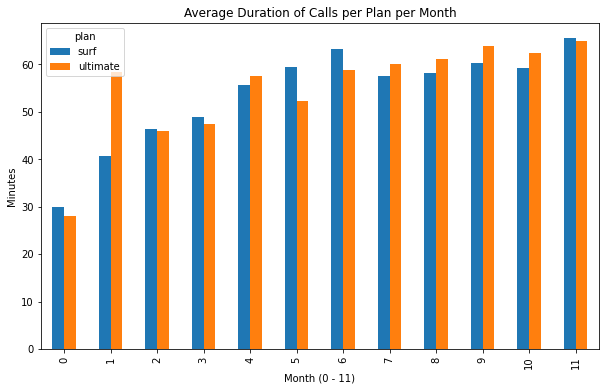

In [29]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.


user_consumption = user_consumption.dropna(subset=['number_of_calls']) # So that the na values don't affect the mean, not even sure if I should've done this

# Group by plan and month and calculate the average duration of calls
average_duration = user_consumption.groupby(['plan', 'month'])['number_of_calls'].mean().reset_index()

# Pivot for better visualization
pivot_table = average_duration.pivot(index='month', columns='plan', values='number_of_calls')

# Plotting
pivot_table.plot(
    title='Average Duration of Calls per Plan per Month',
    kind='bar',
    xticks=(range(12)),
    figsize=(10,6),
    ylabel = 'Minutes',
    xlabel = 'Month (0 - 11)'
    )
plt.show()



<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Observation</b> The average length of calls per month increase gradually as the year progresses.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Observation (after fix)</b> In most months, the users of each plan usually have about the same length of calls. It does gradually get longer as the year goes by and plateaus at around July with a spike of Ultimate users in February.

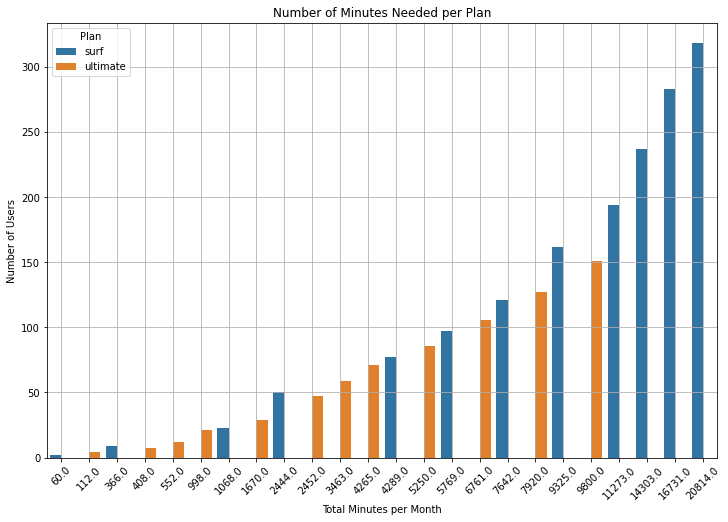

In [30]:
summary_df = user_consumption.groupby(['plan', 'month']).agg({'number_of_calls': 'sum', 'user_id': 'nunique'}).reset_index()

# Plotting a bar plot using Seaborn because I couldn't figure out how to do it otherwise


plt.figure(figsize=(12, 8))
sns.barplot(x='number_of_calls', y='user_id', hue='plan', data=summary_df)

plt.title('Number of Minutes Needed per Plan')
plt.xlabel('Total Minutes per Month')
plt.ylabel('Number of Users')
plt.legend(title='Plan')
plt.grid(True)
plt.xticks(rotation=45)


# Show the plot
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Observation</b> Don't know if I did this right, looks a little strange. Did try with many different number of bins and looked the same.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Observation 2</b> Again, surf users tend to use almost double the amount of minutes that ultimate users do, and they tend to use more as the year goes on

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Observation (after fix)</b> I still don't know if it's right but according to this plot, surf users have a higher average of minutes used per month than ultimate users.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

We need to compare the number of minutes needed by users of each tariff plan per month. Construct a histogram.
    
---
    
Further on in the project in the same way

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's Comment</b> It was a histogram before, I had to change it to a bar plot to get it to look correct.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

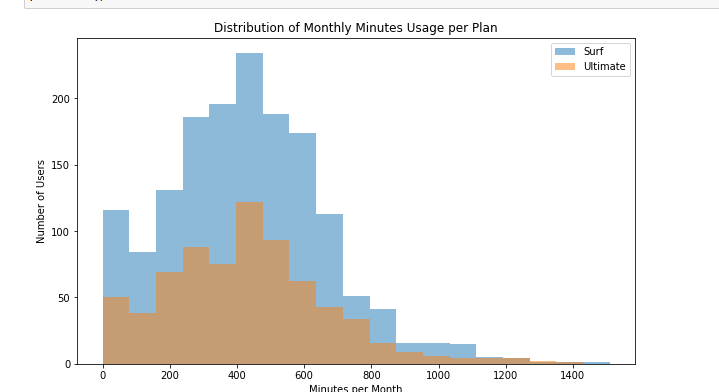You need to display on the ordinate axis the number of users and on the abscissa axis the number of minutes. Please see the example
    
---
    
---
    
Further on in the project in the same way    

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №4__


Can you please look at an example
</div>

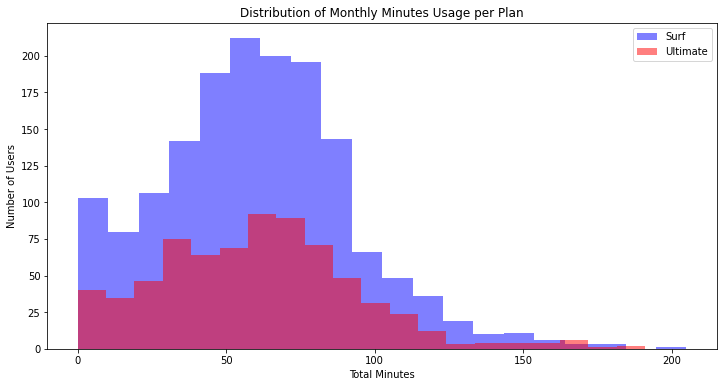

In [45]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
surf_minutes = user_consumption[user_consumption['plan'] == 'surf']['number_of_calls']
ultimate_minutes = user_consumption[user_consumption['plan'] == 'ultimate']['number_of_calls']

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot histogram for Surf plan
plt.hist(surf_minutes, bins=20, alpha=0.5, label='Surf', color='blue')

# Plot histogram for Ultimate plan
plt.hist(ultimate_minutes, bins=20, alpha=0.5, label='Ultimate', color='red')

# Add titles and labels
plt.title('Distribution of Monthly Minutes Usage per Plan')
plt.xlabel('Total Minutes')
plt.ylabel('Number of Users')
plt.legend()

plt.show()

[Calculate the mean and the variance of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [31]:
# Calculate the mean and the variance of the monthly call duration
plan_call_stats = user_consumption.groupby('plan')['number_of_calls'].agg(['mean', 'var']).reset_index()

# Calculate mean and variance of monthly call duration for each plan
monthly_call_stats = user_consumption.groupby(['plan', 'month'])['number_of_calls'].agg(['mean', 'var']).reset_index()

display(plan_call_stats)
print()
display(monthly_call_stats)


,plan,mean,var
0,surf,59.811825,1025.15159
1,ultimate,60.626389,1105.09666


,plan,month,mean,var
0,surf,2018-01,30.000000,288.000000
1,surf,2018-02,40.666667,798.750000
2,surf,2018-03,46.434783,696.529644
3,surf,2018-04,48.880000,877.128163
4,surf,2018-05,55.701299,1151.554340
5,surf,2018-06,59.474227,819.751933
6,surf,2018-07,63.157025,1133.100138
7,surf,2018-08,57.561728,1046.483744
8,surf,2018-09,58.108247,912.335372
9,surf,2018-10,60.350211,997.296324


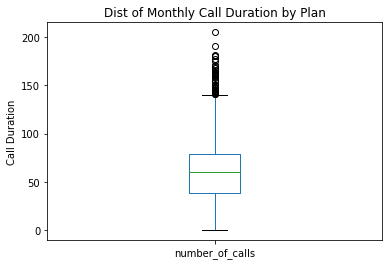

In [32]:
# Plot a boxplot to visualize the distribution of the monthly call duration

user_consumption.plot(kind='box', x='plan', y='number_of_calls', xlabel='Plan', ylabel='Call Duration', title='Dist of Monthly Call Duration by Plan')
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Observation</b> I don't think the behavior between the plans is very different if at all

### Messages

In [33]:
# Compare the number of messages users of each plan tend to send each month

sum_msgs = user_consumption.groupby(['plan', 'month'])['messages_count'].sum().reset_index()
display(sum_msgs)

,plan,month,messages_count
0,surf,2018-01,21.0
1,surf,2018-02,108.0
2,surf,2018-03,351.0
3,surf,2018-04,870.0
4,surf,2018-05,1849.0
5,surf,2018-06,2454.0
6,surf,2018-07,3271.0
7,surf,2018-08,4662.0
8,surf,2018-09,5968.0
9,surf,2018-10,8020.0


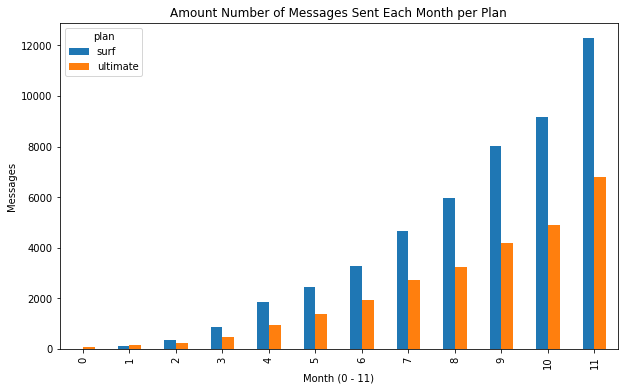

In [34]:

msgs_pivot = sum_msgs.pivot(index='month', columns='plan', values='messages_count')

# Plotting
msgs_pivot.plot(
    title='Amount Number of Messages Sent Each Month per Plan',
    kind='bar',
    xticks=(range(12)),
    figsize=(10,6),
    ylabel = 'Messages',
    xlabel = 'Month (0 - 11)'
    )
plt.show()


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Observation</b> The amount of messages drastically increases as the year goes on and users using the surf plan send many more messages than users with the ultimate plan


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

In [35]:
# Compare the amount of internet traffic consumed by users per plan

In [36]:
user_consumption.rename(columns={'total_gb_used':'total_mb_used'}, inplace=True)
sum_inter = user_consumption.groupby(['plan', 'month']).agg({'total_mb_used': 'sum', 'user_id': 'nunique'}).reset_index()
display(sum_inter)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,plan,month,total_mb_used,user_id
0,surf,2018-01,10.0,2
1,surf,2018-02,110.0,9
2,surf,2018-03,312.0,23
3,surf,2018-04,611.0,50
4,surf,2018-05,1087.0,77
5,surf,2018-06,1502.0,97
6,surf,2018-07,2042.0,121
7,surf,2018-08,2735.0,162
8,surf,2018-09,3238.0,194
9,surf,2018-10,4126.0,237


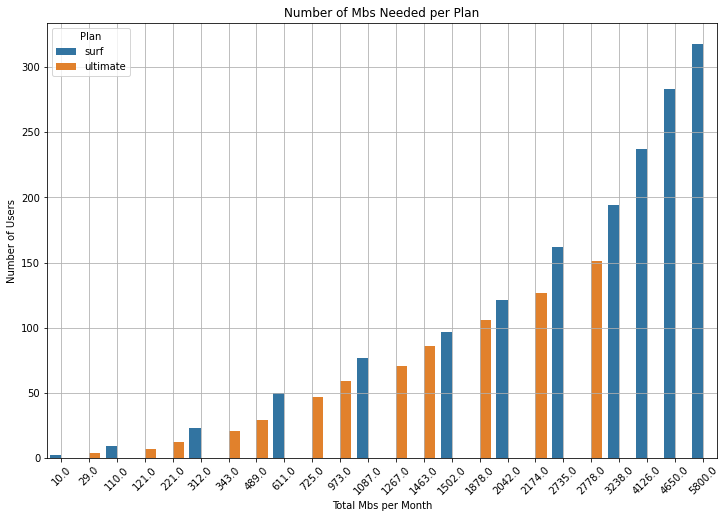

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_mb_used', y='user_id', hue='plan', data=sum_inter)

plt.title('Number of Mbs Needed per Plan')
plt.xlabel('Total Mbs per Month')
plt.ylabel('Number of Users')
plt.legend(title='Plan')
plt.grid(True)
plt.xticks(rotation=45)


# Show the plot
plt.show()

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Observation</b> Same general shape as messages, more is being used as the year progesses and people with the surf plan use more than those with ultimate

 <div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Observation (after fix)</b> Same shape as the minutes used distribution where surf users have a higher average Mbs used by almost double the peak of ultimate users Mbs

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [38]:
sum_revenue = user_consumption.groupby(['plan', 'month']).agg({'monthly_revenue': 'sum', 'user_id': 'nunique'}).reset_index()
display(sum_revenue)

,plan,month,monthly_revenue,user_id
0,surf,2018-01,40.00,2
1,surf,2018-02,300.24,9
2,surf,2018-03,1040.39,23
3,surf,2018-04,1982.61,50
4,surf,2018-05,3539.66,77
5,surf,2018-06,4624.49,97
6,surf,2018-07,7317.58,121
7,surf,2018-08,10139.19,162
8,surf,2018-09,11026.09,194
9,surf,2018-10,15079.58,237


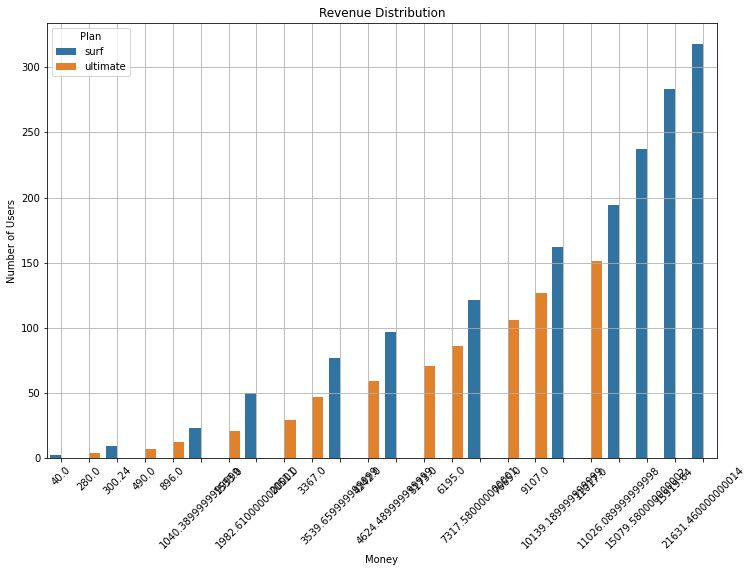

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x='monthly_revenue', y='user_id', hue='plan', data=sum_revenue)

plt.title('Revenue Distribution')
plt.xlabel('Money')
plt.ylabel('Number of Users')
plt.legend(title='Plan')
plt.grid(True)
plt.xticks(rotation=45)


# Show the plot
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Observation</b> Same shape, but this time ultimate brings in more revenue which is interesting because it seems they generally use less than surf users

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

The formulation of the null and alternative hypothesis is missing. Please add

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Hypothesis Formulation</b>
    
    H0 = There isn't a significant difference in the average revenue between Ultimate and Surf plans
    H1 = There is a significant enough difference in the average revenue between Ultimate and Surf plans


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

Correct interpretation of the null and alternative hypothesis

In [40]:
# Test the hypotheses
revenue_ultimate = sum_revenue[sum_revenue['plan'] == 'ultimate']['monthly_revenue']
revenue_surf = sum_revenue[sum_revenue['plan'] == 'surf']['monthly_revenue']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(revenue_ultimate.dropna(), revenue_surf.dropna(), equal_var=True)

# Compare p-value to alpha
alpha = 0.05
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest that the average revenue differs between Ultimate and Surf plans.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in average revenue between Ultimate and Surf plans.")


p-value: 0.15292825278103056
Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in average revenue between Ultimate and Surf plans.


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Description</b> The question just asked if they differ, not in any particular direction, so I made it a two-sided test. I made the null hypothesis (H0) be that there isn't a difference in average revenue because if the p_value is bigger than alpha, then that means there was a significant enough difference (according to the alpha value I set).

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

It sounds like you've approached the hypothesis testing as a two-sided test, where the question revolves around whether there's a difference in revenue, without specifying a particular direction. Based on this, it seems you've set the null hypothesis (H0) as no difference in average revenue, and if the p-value is greater than alpha, it indicates a significant difference based on the set alpha value.

While the two-sided test handles the question of a difference without specifying a particular direction, formally articulating the null and alternative hypotheses adds clarity and ensures that the statistical test aligns with the research question. This detailed formulation can provide a clear framework for your analysis and ensure a more robust interpretation of the results.
    
---
    
Hypotheses are formulated like this:

    Но = .....
    
    Н1 = ....

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

Likewise

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Hypothesis Formulation</b>
    
    H0 = There isn't a significant difference in the average revenue between users in the NY-NJ area and other regions
    H1 = There is a significant enough difference in the average revenue between NY-NJ area and other regions


In [41]:
# Test the hypotheses
user_consumption = pd.merge(user_consumption, users[['user_id', 'city']], on='user_id', how='left')

revenue_nynj = user_consumption[user_consumption['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
revenue_other = user_consumption[user_consumption['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(revenue_nynj.dropna(), revenue_other.dropna(), equal_var=True)

# Compare p-value to alpha
alpha = 0.05
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest that the average revenue differs between NY-NJ and other regions.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in average revenue between NY-NJ and other regions.")

p-value: 0.037268218697167156
Reject the null hypothesis. There is enough evidence to suggest that the average revenue differs between NY-NJ and other regions.


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Description</b> It only asked if there was a difference, not in any particular direction, so it's another two sided test. I made the null hypothesis be that there isn't a difference in how the NY-NJ area uses the service because if the p_value was higher than the alpha that I set, then that means there is a significant difference.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

Correct

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Conclusion</b> The 'Ultimate' plan offered by Megaline generates higher revenue, despite users on this plan using services less frequently than 'Surf' plan users. Additionally, the revenue generated by users in the NY-NJ area differs significantly from that of users in other regions.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Recommendations</b> 

<b>Marketing Emphasis:</b> Given the higher revenue potential of the 'Ultimate' plan, consider focusing marketing efforts on promoting and attracting more users to the 'Ultimate' plan. Emphasize the value and benefits that justify the higher cost.

<b>Regional Tailoring:</b> Recognize the regional differences in revenue patterns. Tailor marketing strategies or plan offerings based on the specific needs and preferences of users in the NY-NJ area to maximize revenue potential in that region.

<b>Service Utilization Analysis:</b> Investigate the factors contributing to the lower service usage among 'Ultimate' plan users. Identify potential areas for improvement or additional features that could enhance the perceived value of the 'Ultimate' plan and encourage increased service utilization.

<b>Customer Segmentation:</b> Explore further segmentation of customers based on their usage patterns, preferences, and regional location. This can inform targeted marketing campaigns and personalized offerings that better meet the diverse needs of different customer segments.

<b>Competitor Analysis:</b> Continuously monitor and analyze competitors' pricing models, plan structures, and regional strategies. Stay agile and adjust offerings to remain competitive in the market.

<b>Customer Feedback:</b> Gather feedback from users, especially those on the 'Ultimate' plan, to understand their satisfaction, preferences, and expectations. Use this information to make data-driven decisions for improving services and customer experience.

<b>Promotions and Incentives:</b> Consider introducing promotions or incentives to encourage users to upgrade to the 'Ultimate' plan or to attract new users. This could involve limited-time discounts, bundled services, or other appealing offers.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №2__


That's a great conclusion. Correct it, please, after correction.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__



Let's increase the length of the output a bit (it is missing). It's a good practice to write all your activities (briefly) on the project in the overall conclusion. After all, the conclusion reveals to the customer all the work you have done and what he is paying money for, even if he is not interested in the whole research process, he will look into the report. 

---

Also do not forget to write about the main results of the research    
    
---    
    
Also, after the research is done, the business will need recommendations.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №4__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊